In [1416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

# Praktikum Kaggle Data Mining

Link kaggle : https://www.kaggle.com/t/b74d548ddb6e91aff251ec5819eb46c1

## 1. Prepare Dataset

In [1420]:
# import data menggunakan parsing
df = pd.read_csv("train.csv",
                 low_memory=False,
                 parse_dates=["time"])
df.head().T

,0,1,2,3,4
time,2018-06-01 09:00:00,2020-03-15 04:00:00,2021-03-11 11:00:00,2018-06-29 01:00:00,2019-03-31 03:00:00
temperature_2m (°C),28.8,24.9,28.7,24.9,12.7
relativehumidity_2m (%),78.0,97.0,64.0,90.0,92.0
dewpoint_2m (°C),24.6,24.4,21.3,23.1,11.5
apparent_temperature (°C),33.7,31.9,34.4,28.3,12.8
pressure_msl (hPa),1010.8,1008.5,1013.6,1012.8,1016.6
surface_pressure (hPa),1010.3,1010.2,1015.3,987.2,743.8
snowfall (cm),0.0,0.0,0.0,0.0,0.0
cloudcover (%),50.0,20.0,76.0,65.0,100.0
cloudcover_low (%),13.0,2.0,32.0,48.0,81.0


In [1421]:
# import data menggunakan parsing
df_test = pd.read_csv("test_case.csv",
                 low_memory=False,
                 parse_dates=["time"])
df_test.head().T

,0,1,2,3,4
time,2020-02-02 01:00:00,2020-03-15 18:00:00,2019-10-25 09:00:00,2019-01-26 02:00:00,2022-10-05 19:00:00
temperature_2m (°C),-27.4,-1.8,0.8,-19.2,12.6
relativehumidity_2m (%),57.0,79.0,65.0,61.0,98.0
dewpoint_2m (°C),-33.3,-4.9,-4.9,-24.8,12.3
pressure_msl (hPa),1006.2,1007.3,1000.3,1020.8,1018.0
surface_pressure (hPa),966.3,1002.6,964.5,981.4,745.9
snowfall (cm),0.0,0.0,0.28,0.0,0.0
cloudcover (%),96.0,13.0,100.0,100.0,100.0
cloudcover_low (%),92.0,0.0,73.0,95.0,99.0
cloudcover_mid (%),19.0,22.0,100.0,96.0,7.0


## 2. Clearing Data

In [1423]:
# cek apakah ada missing value
df.isna().sum()

time                                    0
temperature_2m (°C)                   119
relativehumidity_2m (%)               119
dewpoint_2m (°C)                      119
apparent_temperature (°C)             119
pressure_msl (hPa)                    119
surface_pressure (hPa)                119
snowfall (cm)                         119
cloudcover (%)                        119
cloudcover_low (%)                    119
cloudcover_mid (%)                    119
cloudcover_high (%)                   119
shortwave_radiation (W/m²)            119
direct_radiation (W/m²)               119
diffuse_radiation (W/m²)              119
direct_normal_irradiance (W/m²)       112
windspeed_10m (km/h)                  119
windspeed_100m (km/h)                 119
winddirection_10m (°)                 451
winddirection_100m (°)                260
windgusts_10m (km/h)                  119
et0_fao_evapotranspiration (mm)       119
vapor_pressure_deficit (kPa)          119
soil_temperature_0_to_7cm (°C)    

In [1424]:
# cek apakah ada data yang duplikat
df.duplicated().sum()

0

In [1425]:
# cek unique value setiap colom
df.nunique()

time                                   33336
temperature_2m (°C)                      284
relativehumidity_2m (%)                   80
dewpoint_2m (°C)                         226
apparent_temperature (°C)                378
pressure_msl (hPa)                       197
surface_pressure (hPa)                   599
snowfall (cm)                              1
cloudcover (%)                           101
cloudcover_low (%)                       101
cloudcover_mid (%)                       101
cloudcover_high (%)                      101
shortwave_radiation (W/m²)              1068
direct_radiation (W/m²)                  950
diffuse_radiation (W/m²)                 464
direct_normal_irradiance (W/m²)         9374
windspeed_10m (km/h)                     293
windspeed_100m (km/h)                    369
winddirection_10m (°)                    360
winddirection_100m (°)                   360
windgusts_10m (km/h)                     172
et0_fao_evapotranspiration (mm)           98
vapor_pres

Bisa dilihat kolom `snowfall (cm)` dan `id` memiliki unique value sebanyak `1` dan `238644 (sama panjang dengan data)` kita bisa menghapusnya karena kedua kolom tersebut tidak akan membantu prediksi model

In [1427]:
df.drop(['snowfall (cm)', 'id'], axis=1, inplace=True)

In [1428]:
# lakukan hal yang sama pada data test
df_test.drop(['snowfall (cm)', 'id'], axis=1, inplace=True)

In [1429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238644 entries, 0 to 238643
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   time                                238644 non-null  datetime64[ns]
 1   temperature_2m (°C)                 238525 non-null  float64       
 2   relativehumidity_2m (%)             238525 non-null  float64       
 3   dewpoint_2m (°C)                    238525 non-null  float64       
 4   apparent_temperature (°C)           238525 non-null  float64       
 5   pressure_msl (hPa)                  238525 non-null  float64       
 6   surface_pressure (hPa)              238525 non-null  float64       
 7   cloudcover (%)                      238525 non-null  float64       
 8   cloudcover_low (%)                  238525 non-null  float64       
 9   cloudcover_mid (%)                  238525 non-null  float64       
 10  cloudcov

Kita mengetahui bahwa masih ada `Missing Values` pada dataset, kita akan melakukan `Imputasi` untuk menangani hal tersebut

In [1431]:
# cek mana saja kolom yang memiliki Missing values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

temperature_2m (°C)
relativehumidity_2m (%)
dewpoint_2m (°C)
apparent_temperature (°C)
pressure_msl (hPa)
surface_pressure (hPa)
cloudcover (%)
cloudcover_low (%)
cloudcover_mid (%)
cloudcover_high (%)
shortwave_radiation (W/m²)
direct_radiation (W/m²)
diffuse_radiation (W/m²)
direct_normal_irradiance (W/m²)
windspeed_10m (km/h)
windspeed_100m (km/h)
winddirection_10m (°)
winddirection_100m (°)
windgusts_10m (km/h)
et0_fao_evapotranspiration (mm)
vapor_pressure_deficit (kPa)
soil_temperature_0_to_7cm (°C)
soil_temperature_7_to_28cm (°C)
soil_temperature_28_to_100cm (°C)
soil_temperature_100_to_255cm (°C)
soil_moisture_0_to_7cm (m³/m³)
soil_moisture_7_to_28cm (m³/m³)
soil_moisture_28_to_100cm (m³/m³)
soil_moisture_100_to_255cm (m³/m³)


Selanjutnya kita akan menggunakan `median` untuk mengisi nilai yang hilang

In [1433]:
# mengisi missing values dengan median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label] = content.fillna(content.median())

Cek apakah data sudah terisi

In [1435]:
df.isna().sum()

time                                  0
temperature_2m (°C)                   0
relativehumidity_2m (%)               0
dewpoint_2m (°C)                      0
apparent_temperature (°C)             0
pressure_msl (hPa)                    0
surface_pressure (hPa)                0
cloudcover (%)                        0
cloudcover_low (%)                    0
cloudcover_mid (%)                    0
cloudcover_high (%)                   0
shortwave_radiation (W/m²)            0
direct_radiation (W/m²)               0
diffuse_radiation (W/m²)              0
direct_normal_irradiance (W/m²)       0
windspeed_10m (km/h)                  0
windspeed_100m (km/h)                 0
winddirection_10m (°)                 0
winddirection_100m (°)                0
windgusts_10m (km/h)                  0
et0_fao_evapotranspiration (mm)       0
vapor_pressure_deficit (kPa)          0
soil_temperature_0_to_7cm (°C)        0
soil_temperature_7_to_28cm (°C)       0
soil_temperature_28_to_100cm (°C)     0


## 3. Exploratory Data Analysis (EDA) 

Setelah melakukan Clearing data, selanjutnya kita akan melakukan `EDA`. `EDA` dapat membantu mengidentifikasi kesalahan yang jelas, serta memahami pola dalam data dengan lebih baik, mendeteksi outlier atau kejadian yang tidak wajar, dan menemukan hubungan yang menarik di antara variabel.

In [1438]:
df.describe()

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
count,238644,238644.000000,238644.000000,238644.000000,238644.000000,238644.000000,238644.000000,238644.000000,238644.000000,238644.000000,...,238644.000000,238644.000000,238644.000000,238644.000000,238644.000000,238644.000000,238644.000000,238644.000000,238644.000000,238644.000000
mean,2019-10-07 18:48:07.765876992,24.988575,85.378333,22.163526,30.139451,1011.338187,966.938711,55.045419,24.101712,27.524061,...,0.160297,0.535453,25.258361,25.166525,25.142356,25.131267,0.294225,0.292777,0.290693,0.325302
min,2018-01-01 00:00:00,7.800000,21.000000,6.000000,6.200000,1002.700000,738.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,10.900000,13.100000,14.900000,15.400000,0.033000,0.034000,0.035000,0.073000
25%,2018-11-07 17:00:00,24.100000,80.000000,21.200000,29.000000,1009.500000,984.800000,32.000000,5.000000,5.000000,...,0.000000,0.190000,22.900000,23.900000,24.100000,24.100000,0.184000,0.179000,0.158000,0.250000
50%,2019-09-14 11:00:00,26.100000,88.000000,23.700000,31.900000,1011.100000,992.200000,52.000000,15.000000,18.000000,...,0.030000,0.390000,26.000000,26.300000,26.400000,26.400000,0.340000,0.334000,0.330000,0.371000
75%,2020-08-28 14:00:00,27.800000,93.000000,24.600000,34.100000,1012.800000,1010.500000,80.000000,32.000000,40.000000,...,0.300000,0.730000,27.800000,27.400000,27.200000,27.100000,0.403000,0.402000,0.397000,0.414000
max,2022-12-28 23:00:00,36.900000,100.000000,29.600000,46.200000,1022.600000,1018.800000,100.000000,100.000000,100.000000,...,1.010000,4.670000,46.900000,35.100000,32.700000,31.600000,0.462000,0.462000,0.462000,0.461000
std,NaN,4.669351,11.326085,3.839199,6.486742,2.671817,72.616321,29.208157,25.992654,28.252760,...,0.212450,0.516922,4.388776,3.745710,3.650451,3.608867,0.133140,0.133775,0.129513,0.115029


Setelah melakukan banyak percobaan. saya memutuskan untuk tidak menggunakan kolom `time` dan `city` dalam proses pembelajaran mesin ini

In [1440]:
# menghapus kolom time dan city
df.drop(['city', 'time'], axis=1, inplace=True)

In [1441]:
# lakukan hal yang sama pada data test
df_test.drop(['city', 'time'], axis=1, inplace=True)

In [1442]:
# cek kembali data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238644 entries, 0 to 238643
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   temperature_2m (°C)                 238644 non-null  float64
 1   relativehumidity_2m (%)             238644 non-null  float64
 2   dewpoint_2m (°C)                    238644 non-null  float64
 3   apparent_temperature (°C)           238644 non-null  float64
 4   pressure_msl (hPa)                  238644 non-null  float64
 5   surface_pressure (hPa)              238644 non-null  float64
 6   cloudcover (%)                      238644 non-null  float64
 7   cloudcover_low (%)                  238644 non-null  float64
 8   cloudcover_mid (%)                  238644 non-null  float64
 9   cloudcover_high (%)                 238644 non-null  float64
 10  shortwave_radiation (W/m²)          238644 non-null  float64
 11  direct_radiation (W/m²)   

#### Membuat Visualisasi Corelation matrix untuk mencari hubungan kuat antar fitur

(29.5, -0.5)

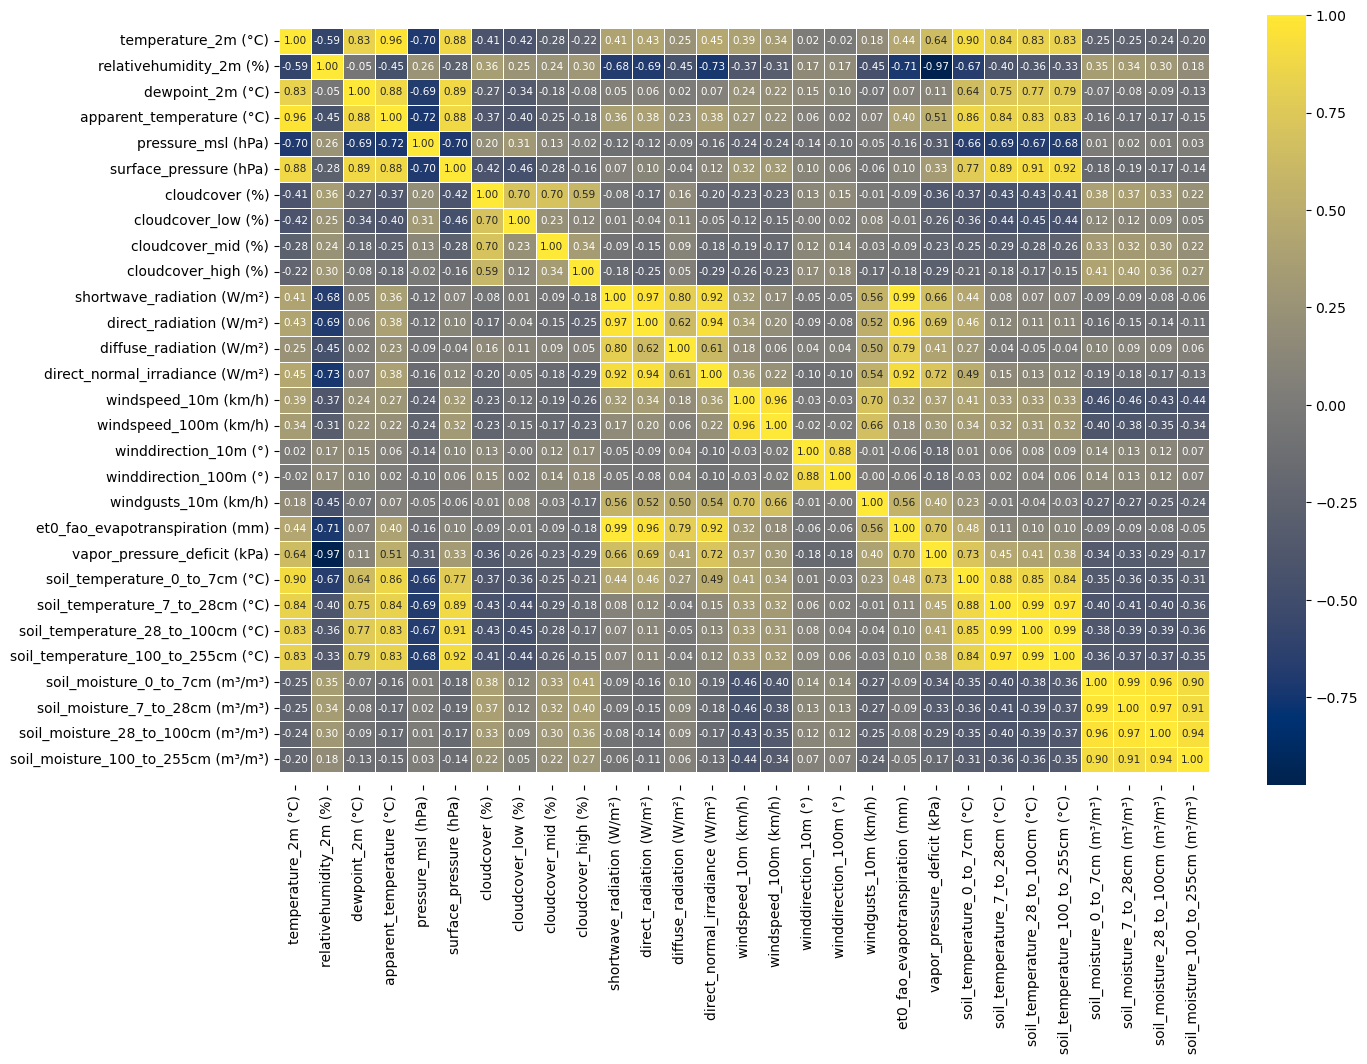

In [1716]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="cividis",
                 annot_kws={"size": 7.5})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

saya akan menggunakan fitur dengan korelasi tinggi `(Mendekati 1 atau mendekati -1)` sebagai fitur yang akan diolah kedepannya

In [1446]:
# fitur pada data train
train_select = df[['temperature_2m (°C)', 'apparent_temperature (°C)', 'surface_pressure (hPa)', 'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)', 'soil_temperature_100_to_255cm (°C)',
                   'pressure_msl (hPa)', 'dewpoint_2m (°C)']]
train_select.head()

,temperature_2m (°C),apparent_temperature (°C),surface_pressure (hPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),pressure_msl (hPa),dewpoint_2m (°C)
0,28.8,33.7,1010.3,29.0,26.7,26.9,27.0,1010.8,24.6
1,24.9,31.9,1010.2,25.8,27.5,27.0,26.5,1008.5,24.4
2,28.7,34.4,1015.3,28.7,25.9,26.4,26.1,1013.6,21.3
3,24.9,28.3,987.2,24.8,25.1,25.3,25.4,1012.8,23.1
4,12.7,12.8,743.8,14.6,16.0,16.8,16.5,1016.6,11.5


In [1447]:
# fitur pada data test
test_select = df_test[['temperature_2m (°C)', 'surface_pressure (hPa)', 'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)', 'soil_temperature_100_to_255cm (°C)',
                   'pressure_msl (hPa)', 'dewpoint_2m (°C)']]
test_select.head()

,temperature_2m (°C),surface_pressure (hPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),pressure_msl (hPa),dewpoint_2m (°C)
0,-27.4,966.3,-14.3,-13.7,-12.5,-10.0,1006.2,-33.3
1,-1.8,1002.6,-0.7,-0.6,0.3,2.0,1007.3,-4.9
2,0.8,964.5,-6.6,-6.7,-5.7,-2.0,1000.3,-4.9
3,-19.2,981.4,-22.3,-22.0,-21.0,-18.0,1020.8,-24.8
4,12.6,745.9,15.8,17.7,16.4,15.8,1018.0,12.3


#### Menampilkan Corelation Matrix dari fitur yang sudah di seleksi

(9.5, -0.5)

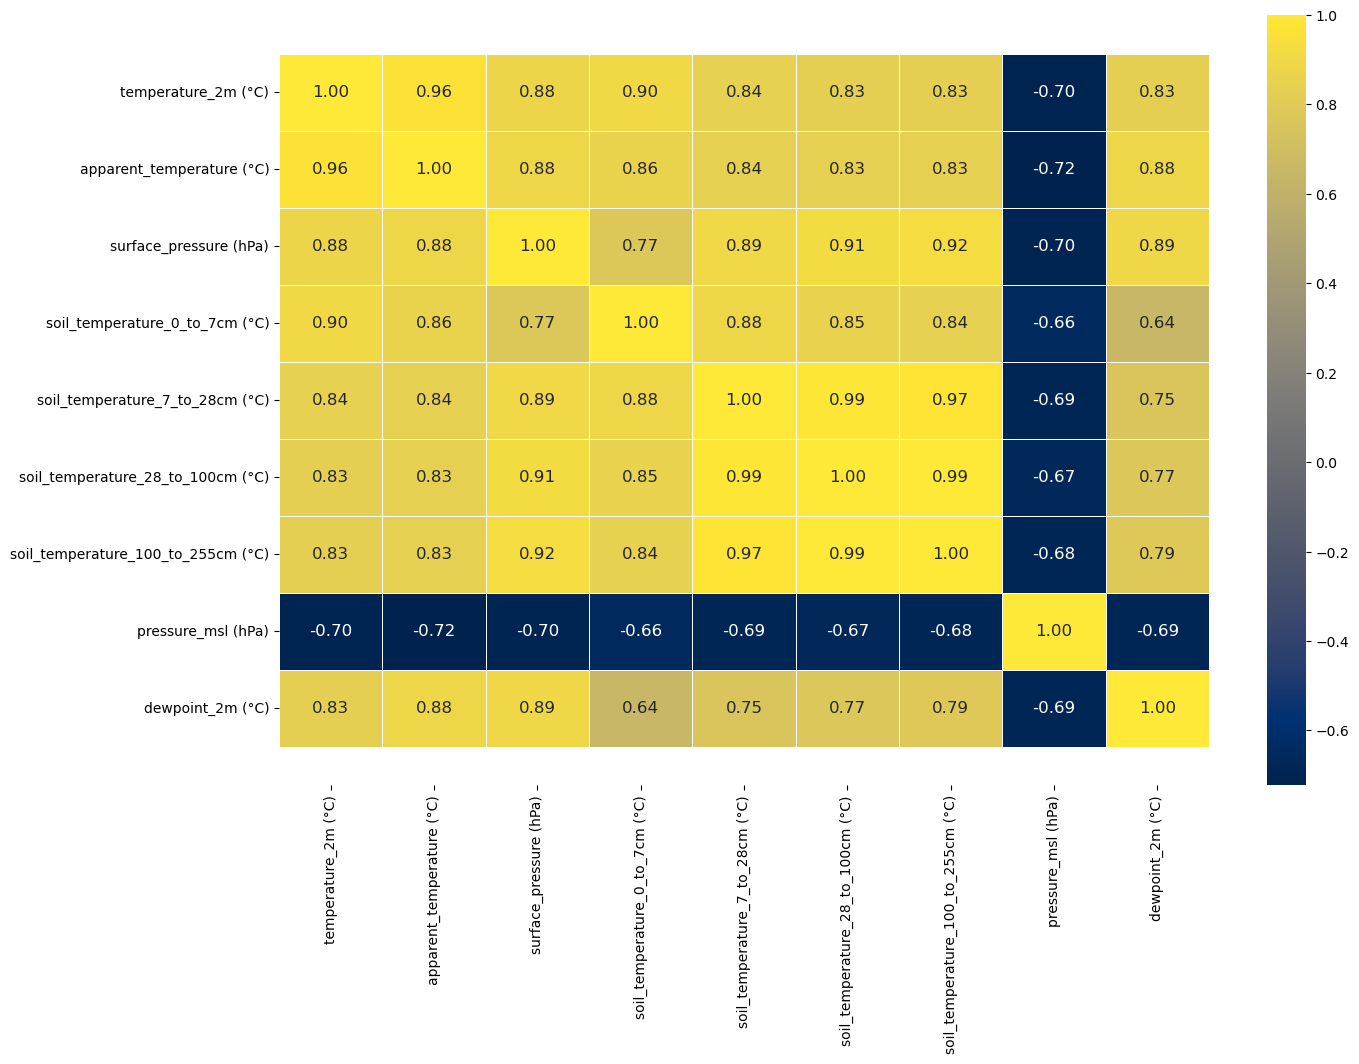

In [1719]:
corr_matrix = train_select.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="cividis",
                 annot_kws={"size": 12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

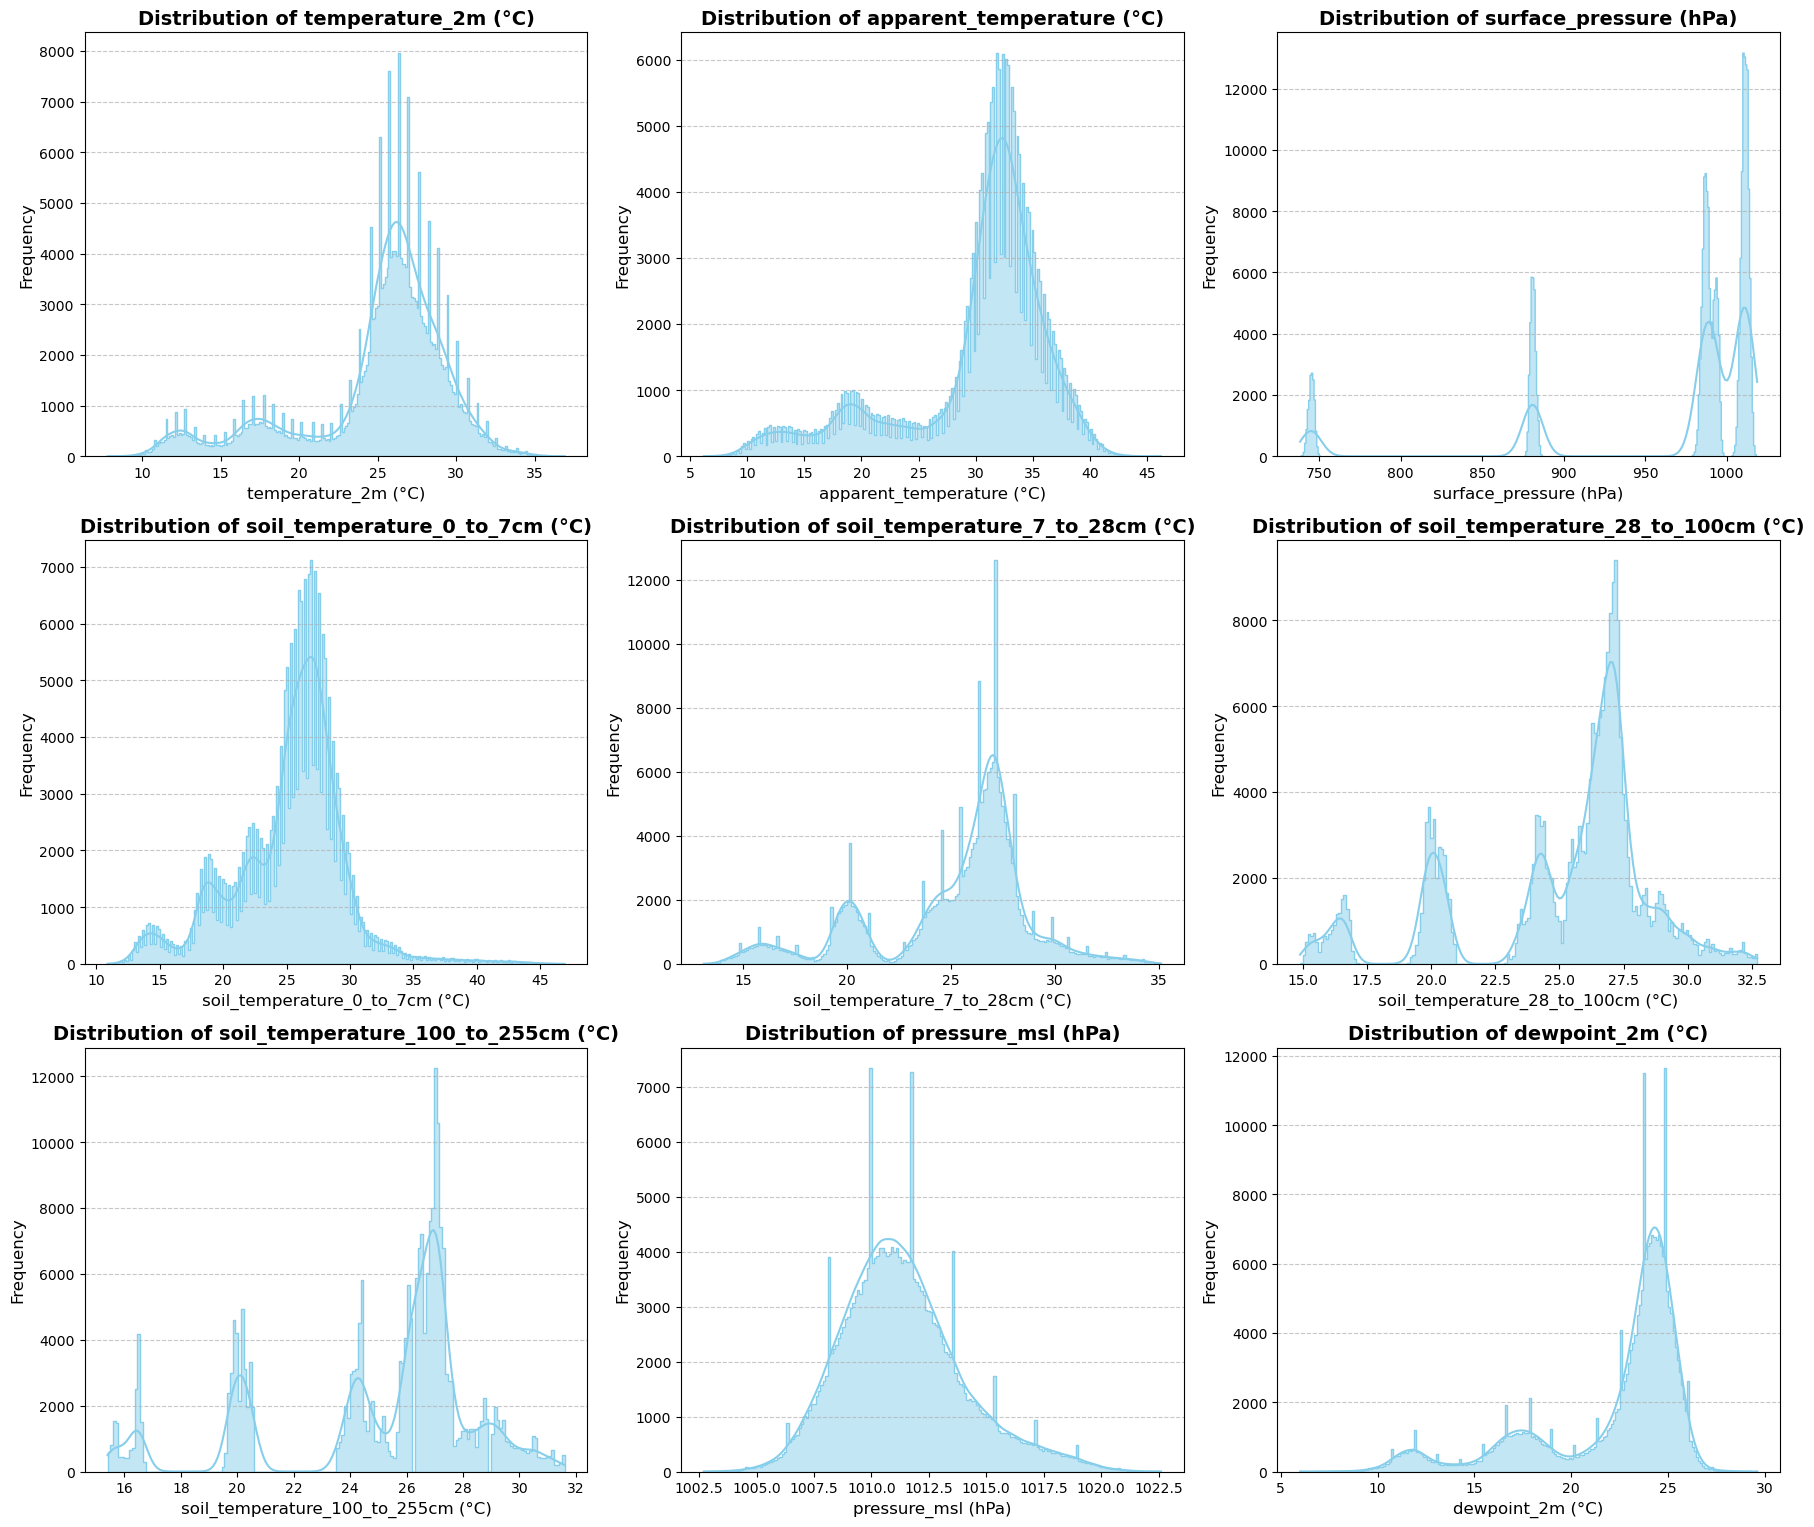

In [1450]:
# Melihat distribusi kolom
n_cols = 3
n_rows = (len(train_select.columns) // n_cols) + 1

# Mengatur ukuran figure
plt.figure(figsize=(18, n_rows * 5))

# Membuat visualisasi histogram untuk setiap kolom dalam train_select
for i, column in enumerate(train_select.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=train_select, x=column, kde=True, color='skyblue', element='step')
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mengatur layout agar tidak overlapping
plt.tight_layout()
plt.show()

In [1451]:
col = train_select.columns
col

Index(['temperature_2m (°C)', 'apparent_temperature (°C)',
       'surface_pressure (hPa)', 'soil_temperature_0_to_7cm (°C)',
       'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'pressure_msl (hPa)',
       'dewpoint_2m (°C)'],
      dtype='object')

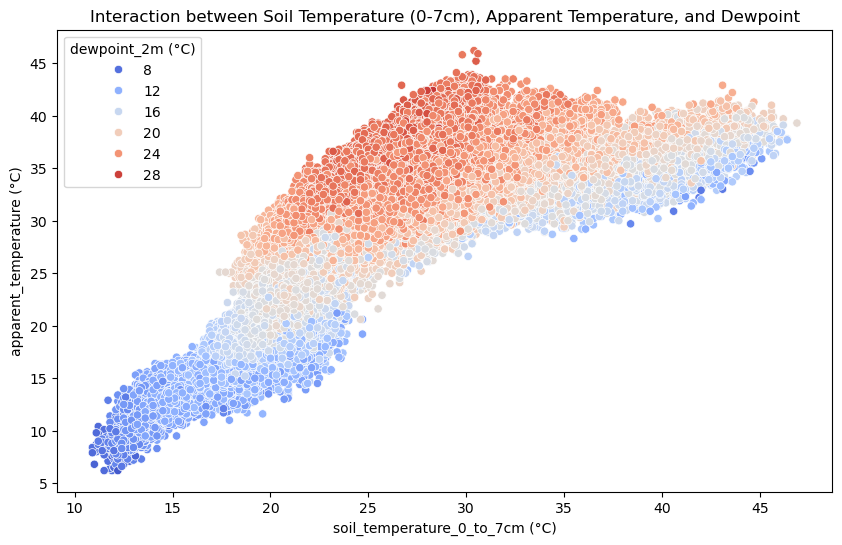

In [1452]:
# Scatter plot for interaction between features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_select['soil_temperature_0_to_7cm (°C)'], y=train_select['apparent_temperature (°C)'], hue=train_select['dewpoint_2m (°C)'], palette='coolwarm')
plt.title('Interaction between Soil Temperature (0-7cm), Apparent Temperature, and Dewpoint')
plt.show()

##### Insight yang di dapat dari Visualisasi diatas

- Terdapat hubungan positif antara `soil temperature (0-7 cm)` dan `apparent temperature`. Semakin tinggi suhu tanah, semakin tinggi suhu yang dirasakan.

- `Dewpoint` menunjukkan peran yang signifikan. Semakin tinggi kelembapan udara `(dewpoint tinggi)`, suhu yang dirasakan juga meningkat

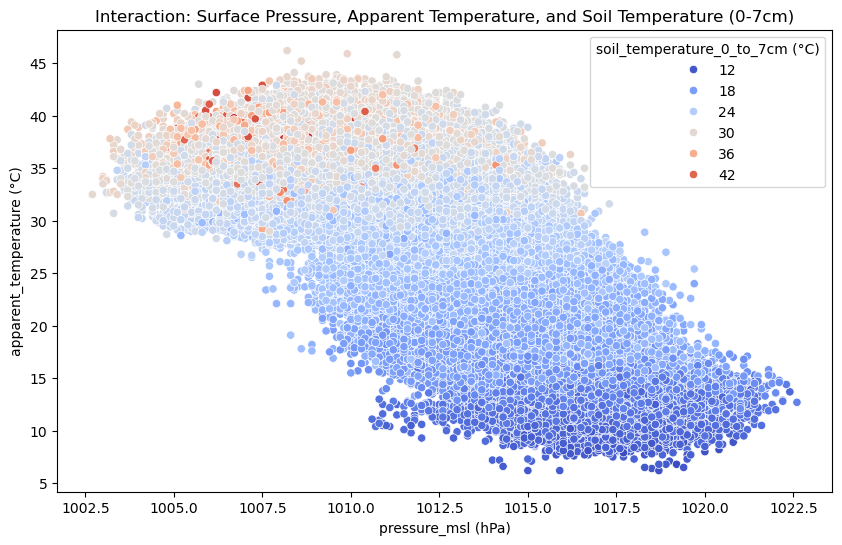

In [1454]:
#Pressure vs Apparent Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_select['pressure_msl (hPa)'], y=train_select['apparent_temperature (°C)'], hue=train_select['soil_temperature_0_to_7cm (°C)'], palette='coolwarm')
plt.title('Interaction: Surface Pressure, Apparent Temperature, and Soil Temperature (0-7cm)')
plt.show()

##### Insight yang di dapat dari Visualisasi diatas

- `Surface pressure` memiliki hubungan negatif yang kuat dengan `apparent temperature`. Ini berarti bahwa semakin tinggi tekanan udara, semakin rendah suhu yang dirasakan.

- `Soil temperature` juga memengaruhi `apparent temperature`, tetapi pengaruhnya lebih terlihat pada tekanan yang lebih rendah, di mana suhu tanah yang tinggi berkontribusi terhadap apparent temperature yang lebih tinggi.

### Melakukan Cek Outlier

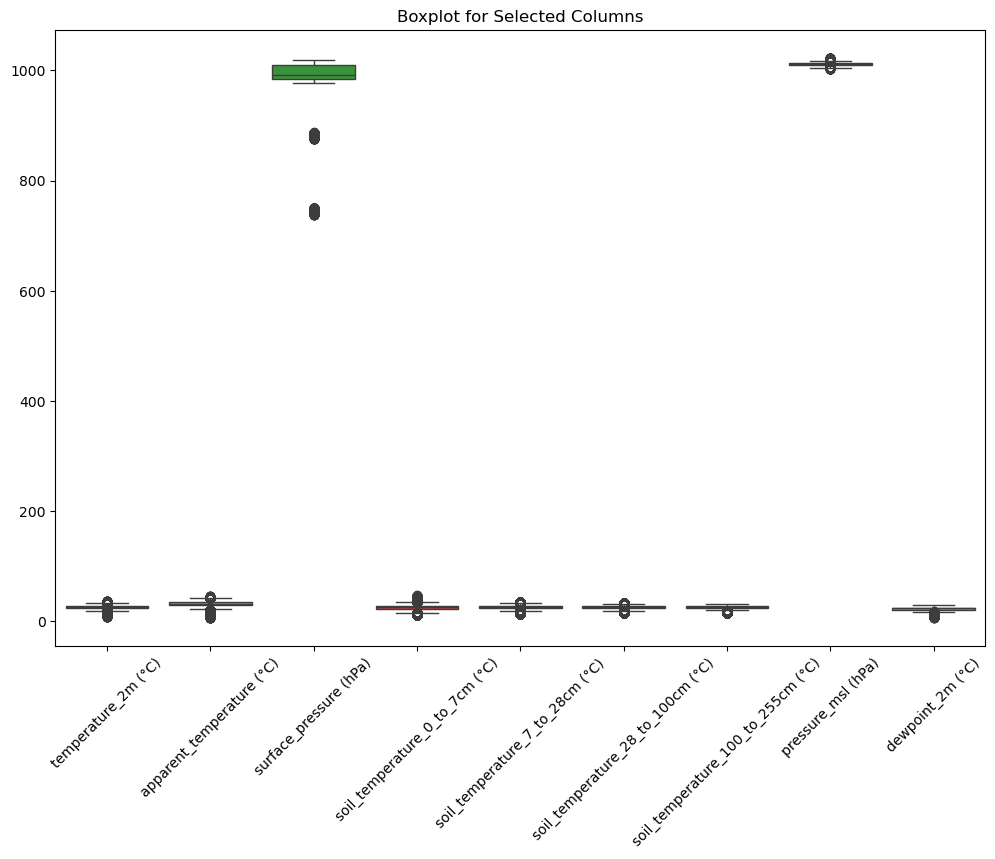

In [1457]:
# Filter the dataset to only these columns
boxplot_data = train_select[col]

# Plotting the boxplot for each column
plt.figure(figsize=(12, 8))
sns.boxplot(data=boxplot_data)
plt.xticks(rotation=45)
plt.title('Boxplot for Selected Columns')
plt.show()

## 4. Preprocessing Data

Melakukan Scaling data menggunakan `StandartdScaler` untuk Memastikan tidak ada fitur yang mendominasi 

In [1460]:
columns = train_select.columns

In [1535]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

mms = MinMaxScaler()
train_scaled = mms.fit_transform(train_select)
data_scaled = pd.DataFrame(data=train_scaled, columns=col)
data_scaled.head()

,temperature_2m (°C),apparent_temperature (°C),surface_pressure (hPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),pressure_msl (hPa),dewpoint_2m (°C)
0,0.721649,0.6875,0.969708,0.502778,0.618182,0.674157,0.716049,0.407035,0.788136
1,0.587629,0.6425,0.969351,0.413889,0.654545,0.679775,0.685185,0.291457,0.779661
2,0.718213,0.7050,0.987527,0.494444,0.581818,0.646067,0.660494,0.547739,0.648305
3,0.587629,0.5525,0.887384,0.386111,0.545455,0.584270,0.617284,0.507538,0.724576
4,0.168385,0.1650,0.019957,0.102778,0.131818,0.106742,0.067901,0.698492,0.233051


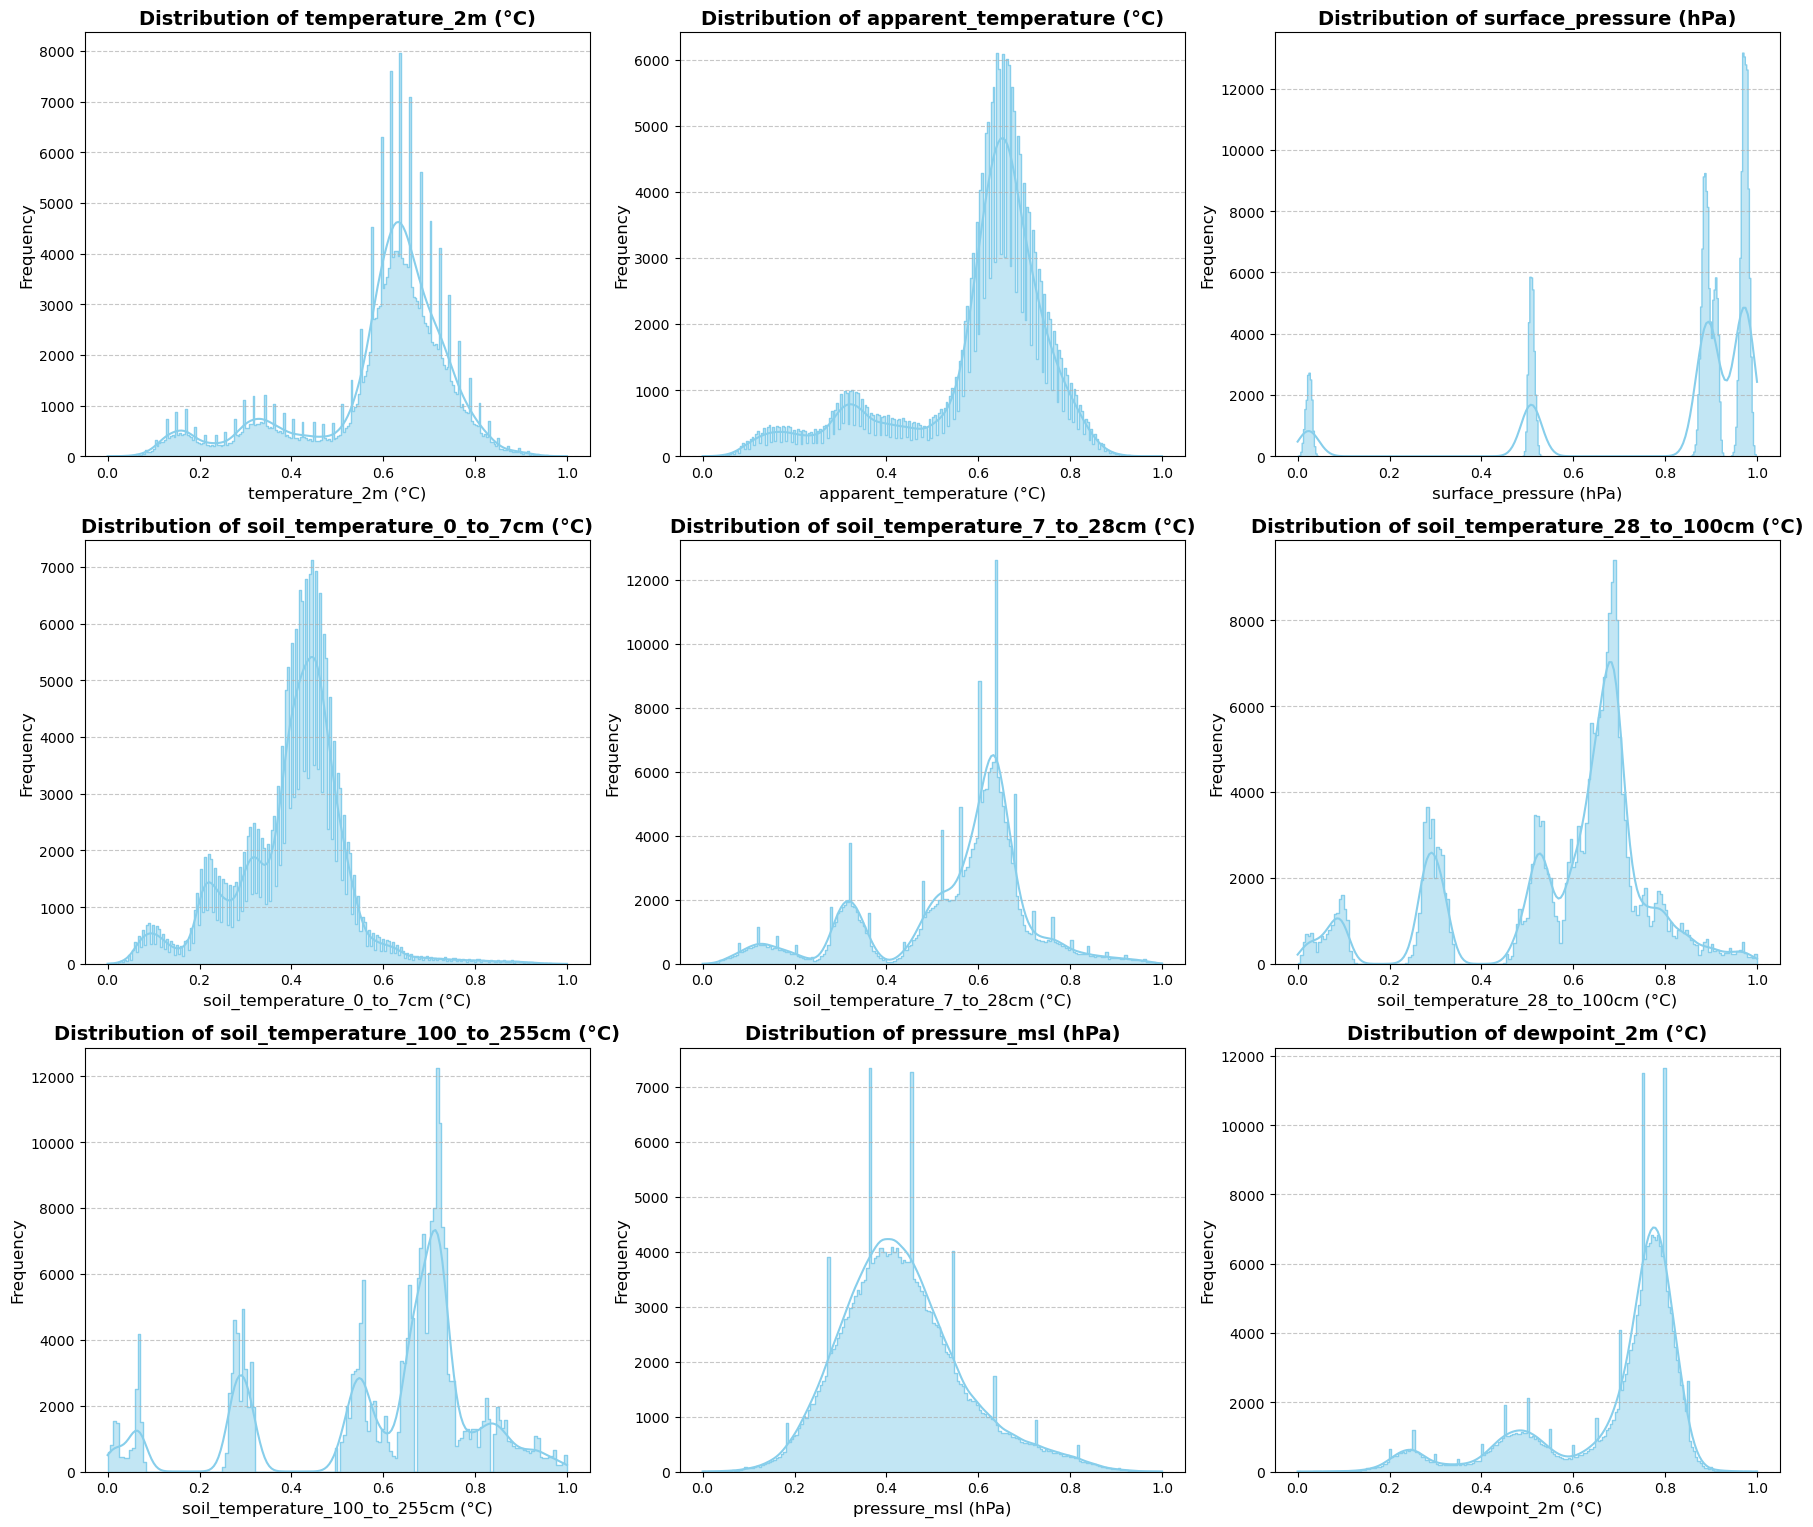

In [1537]:
# Tampilan distribusi data setelag di scaling
# Melihat distribusi kolom
n_cols = 3
n_rows = (len(data_scaled.columns) // n_cols) + 1

# Mengatur ukuran figure
plt.figure(figsize=(18, n_rows * 5))

# Membuat visualisasi histogram untuk setiap kolom dalam data_scaled
for i, column in enumerate(data_scaled.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=data_scaled, x=column, kde=True, color='skyblue', element='step')
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mengatur layout agar tidak overlapping
plt.tight_layout()
plt.show()

## 5. Modelling

Membagi data menjadi dua bagian, yaout `data train` dan `data tests`

In [1540]:
from sklearn.model_selection import train_test_split

X = data_scaled.drop('apparent_temperature (°C)', axis=1)
y = data_scaled['apparent_temperature (°C)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Latih Model `XGboostRegressor`

In [1542]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [1543]:
y_pred = xgb_model.predict(X_test)

In [1544]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# membuat fungsi untuk bahan evaluasi model
def show_scores_with_mse(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_test, val_preds),
        "Training R^2": model.score(X_train, y_train),
        "Valid R^2": model.score(X_test, y_test),
        "Training MSE": mean_squared_error(y_train, train_preds),
        "Valid MSE": mean_squared_error(y_test, val_preds)
    }
    return scores

In [1545]:
show_scores_with_mse(xgb_model)

{'Training MAE': 0.01529405024968962,
 'Valid MAE': 0.01596324434036271,
 'Training R^2': 0.984157667225164,
 'Valid R^2': 0.9825041788972555,
 'Training MSE': 0.0004172314068231163,
 'Valid MSE': 0.00045745655648042513}

### Coba Submit sebelum di tunning dan menggunakan `train_test_split`

In [1547]:
submission = pd.read_csv('SUBMISSION')
submission.head()

,id,apparent_temperature (°C)
0,304873,18.690247
1,274266,19.945227
2,302481,18.346973
3,295946,11.537195
4,254707,13.831410


In [1548]:
y_pred = xgb_model.predict(test_select)

In [1549]:
submission['apparent_temperature (°C)'] = y_pred
submission.to_csv('submission16', index=False)

In [1550]:
submission.head()

,id,apparent_temperature (°C)
0,304873,0.210011
1,274266,0.232639
2,302481,0.630960
3,295946,0.210011
4,254707,0.793728


Hasil Submit menggunakan data dengan metode `train_test_split`

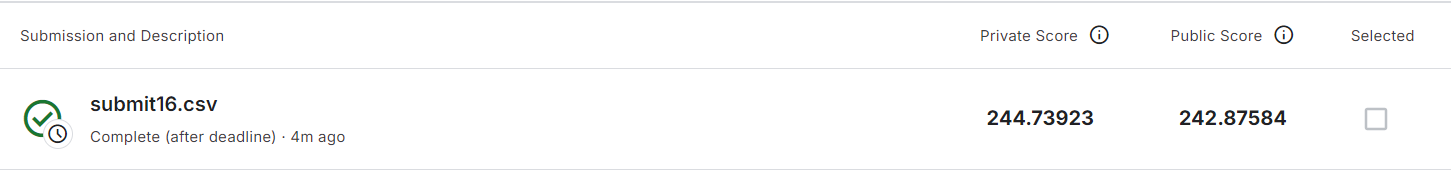

### Coba Submit dengan `100%` data train

In [1564]:
train_x = data_scaled.drop(columns=['apparent_temperature (°C)'])
train_y = data_scaled['apparent_temperature (°C)']

xgb_model2 = XGBRegressor(random_state=42)
xgb_model2.fit(train_x, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [1566]:
# Membuat prediksi untuk di submit
y_pred2 = xgb_model2.predict(test_select)

In [1578]:
submission2 = pd.read_csv('SUBMISSION')
submission2.head()

,id,apparent_temperature (°C)
0,304873,18.690247
1,274266,19.945227
2,302481,18.346973
3,295946,11.537195
4,254707,13.831410


In [1580]:
submission2['apparent_temperature (°C)'] = y_pred2

In [1588]:
df_preds.to_csv('submit17.csv',index = False)

In [1590]:
submission2.head()

,id,apparent_temperature (°C)
0,304873,0.156505
1,274266,0.155799
2,302481,0.639529
3,295946,0.156505
4,254707,0.813548


Hasil Submission dengan `100%` data train

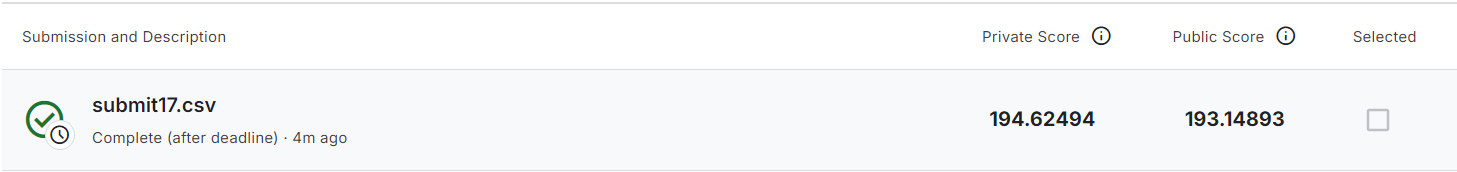

### Coba Submit Dengan Tuning HyperParameter

In [1653]:
from sklearn.model_selection import RandomizedSearchCV
%time
xgb_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "learning_rate": np.linspace(0.01, 0.3, 10),
    "subsample": np.linspace(0.5, 1.0, 10),
    "colsample_bytree": np.linspace(0.5, 1.0, 10),
    "min_child_weight": np.arange(1, 10, 1),
}

# RandomizedSearchCV untuk XGBRegressor
rs_xgb_model = RandomizedSearchCV(
    XGBRegressor(random_state=42),
    param_distributions=xgb_grid,
    n_iter=100,
    cv=5,
    verbose=True
)
rs_xgb_model.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                                        'max_depth': [None, 3, 5, 10],
                                        'min_child_weight': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'subsample': array([0.5       , 0.55555556, 0.61111111, 0.66666667, 0.72222222,
       0.77777778, 0.83333333, 0.88888889, 0.94444444, 1.        ])},
                   verbose=True)

In [1655]:
rs_xgb_model.best_params_

{'subsample': 0.8888888888888888,
 'n_estimators': 90,
 'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.2677777777777778,
 'colsample_bytree': 1.0}

In [1657]:
ideal_model = XGBRegressor(subsample=0.8888888888888888,
                           n_estimators=90,
                           min_child_weight=3,
                           max_depth=10,
                           learning_rate=0.2677777777777778,
                           colsample_bytree=1.0)

ideal_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2677777777777778,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=90, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1659]:
show_scores_with_mse(ideal_model)

{'Training MAE': 0.011251092599817549,
 'Valid MAE': 0.014375691696154293,
 'Training R^2': 0.9914552174291628,
 'Valid R^2': 0.9855980390991579,
 'Training MSE': 0.00022503956353517218,
 'Valid MSE': 0.0003765625746614124}

In [1661]:
submission3 = pd.read_csv('SUBMISSION')
submission3.head()

,id,apparent_temperature (°C)
0,304873,18.690247
1,274266,19.945227
2,302481,18.346973
3,295946,11.537195
4,254707,13.831410


In [1663]:
y_pred3 = ideal_model.predict(test_select)

In [1665]:
submission3['apparent_temperature (°C)'] = y_pred3
submission3.to_csv('submit18.csv', index=False)

In [1667]:
submission3.head()

,id,apparent_temperature (°C)
0,304873,0.165885
1,274266,0.151845
2,302481,0.669241
3,295946,0.165885
4,254707,0.844901


Hasil Submission dari model yang di tuning dengan `RandomizedSearchCV`

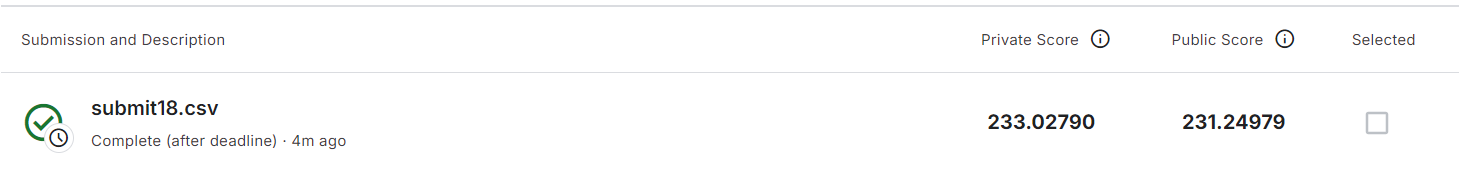

# Kesimpulann
dari sekian banyak percobaan, ternyata data dengan score mse terbaik pada kaggle adalah dataaset yang di olah dengan melatih `100%` data pelatihan

# Terimakasih ^^